In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
resolutions = {
    480: '640x480',
    720: '1280x720',
    1080: '1920x1080',
}

datasets = []

def energy (time, power):
    return power * (time / 1000 / 3600);

for res in [480, 720, 1080]:
    for enc in ['h264', 'mjpeg', 'yuv']:
        dataset = pd.read_csv('vid' + str(res) + enc + '.csv')
        time = dataset.time.max()
        
        dataset['energy'] = dataset.apply(lambda row: energy(time, row.power), axis=1)
        dataset['enc'] = enc
        dataset['res'] = resolutions[res]
        datasets.append(dataset)

In [4]:
master = pd.concat(datasets)

In [5]:
master.head()

,power,time,energy,enc,res
0,1.570,4,0.013149,h264,640x480
1,1.576,38,0.013199,h264,640x480
2,1.284,104,0.010754,h264,640x480
3,1.576,171,0.013199,h264,640x480
4,1.648,237,0.013802,h264,640x480


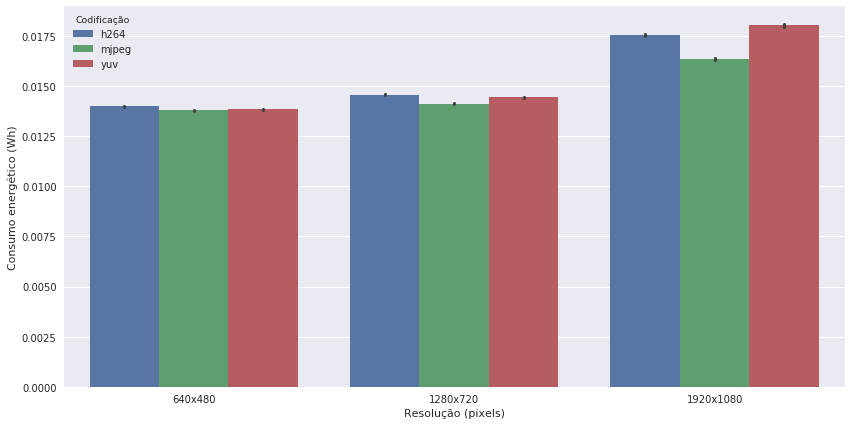

In [6]:
# plt.hist(df.power, bins=5, color=sns.desaturate("green", 1))
# sns.boxplot(df.power)
plt.figure(figsize=(14, 7))

plot = sns.barplot(data=master, hue='enc', x='res', y='energy')

# plot = sns.kdeplot(df.power, shade=True)
plot.set_xlabel('Resolução (pixels)')
plot.set_ylabel('Consumo energético (Wh)')
plot.legend_.set_title('Codificação')

# sns.violinplot(df.current)
# sns.kdeplot(df.power, df.current, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

Text(0,0.5,'Potência (W)')

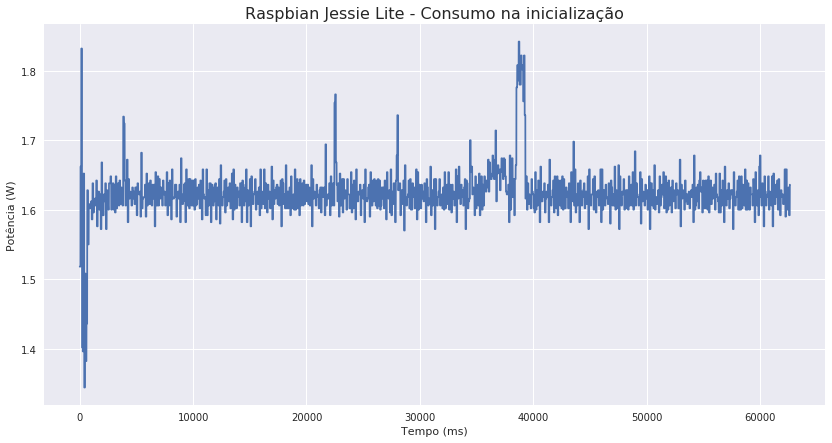

In [6]:

plot = df.set_index('time').power.plot(title='Raspbian Jessie Lite - Consumo na inicialização', figsize=(14,7))
plot.set_xlabel('Tempo (ms)')
plot.set_ylabel('Potência (W)')

In [4]:
df.head()

,power,current,time
0,0.226,43.5,5
1,0.226,43.5,10
2,0.226,43.5,15
3,0.226,43.5,20
4,0.226,43.5,25


In [9]:
df.mean()

power         1.025029
current     199.751020
time       9957.030287
dtype: float64

In [10]:
df.to_csv('jessie-lite-boot.csv')

In [14]:
df = pd.read_csv('jessie-lite-boot-network.csv')

In [15]:
df.mean()

power         1.116462
current     220.738612
time       9957.518091
dtype: float64

In [13]:
df.head()

time
0.276 53.1     5
      53.1    10
      53.1    15
      53.1    20
      53.1    25